The code is from: https://medium.com/@kurtsenol21/topic-modeling-lda-mallet-implementation-in-python-part-3-ab03e01b7cd7 
We edit a bit and add clean data code before training the LDA model.

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [52]:
df = pd.read_csv('/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/reddit_data (1).csv', encoding='utf-8')
df

,type,title,author,score,url,created,num_comments,subreddit,content
0,post,Rednote the chinese version of tik tok is #2 in the app store currently.,GuitarIsLife02,1041,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:50:26+00:00,429.0,TheDeprogram,The people once again showing how based they can be. Maybe foreign perspectives will help a lot of these shitlibs in some sort of way.
1,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,AutoModerator,1,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:50:28+00:00,NaN,TheDeprogram,"☭☭☭ [SUBSCRIBE TO THE BOIS ON YOUTUBE](https://www.youtube.com/@thedeprogram9999/) AND [SUPPORT THE PATREON](https://www.patreon.com/TheDeprogram) COMRADES ☭☭☭\n\nThis is a socialist community based on the podcast of the same name. Please use the report function on content that breaks our rules, or [send a message to our mod team](https://www.reddit.com/message/compose?to=r/TheDeprogram). If you’re new to the sub, please read the sidebar carefully.\n\nIf you’re new to Marxism-Leninism, check out the [study guide](/r/TheDeprogram/wiki/index/education/study-guide/).\n\nAre there Liberals in the walls? Check out [the wiki](/r/TheDeprogram/wiki/index/) which contains lots of useful information.\n\nThis subreddit uses many experimental automod rules. If you notice any issues please use modmail to let us know.\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/TheDeprogram) if you have any questions or concerns.*"
2,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,KazVanilla,322,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:53:37+00:00,NaN,TheDeprogram,"I thought xiaohongshu was the Chinese version (loosely) of instagram? (I’ve had it for a few years now, p good algorithm which can be easily tailored).\n\nAlso how would this shift the perspectives of libs? Xiaohongshu does not explicitly talk about politics (in a sense a western liberal would recognise it) and is moreso just a social media app filled with Chinese people partaking in similar online trends and aesthetics."
3,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,stalbox,128,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 08:07:56+00:00,NaN,TheDeprogram,TikTok/Douyin is the Chinese version of TikTok
4,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,soweli_tonsi,197,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 08:01:10+00:00,NaN,TheDeprogram,goddam this is a bleak snapshot into the very very long and tortuous american collapse
...,...,...,...,...,...,...,...,...,...
21411,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,ToKeNgT,36,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 11:59:54+00:00,NaN,TheDeprogram,https://preview.redd.it/s5iwj0gid5de1.jpeg?width=640&format=pjpg&auto=webp&s=02f2bbaec68a99c2784195d7d7f73fba6e3d5d7e
21412,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,nukefall_,10,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 13:36:19+00:00,NaN,TheDeprogram,METATITLEEE
21413,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,boopbopnotarobot,6,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 14:49:21+00:00,NaN,TheDeprogram,Roll credits!
21414,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,CarpenterCheaper,8,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 15:48:20+00:00,NaN,TheDeprogram,live lightiggy reaction:\n\nhttps://i.redd.it/uago21d9i6de1.gif


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          21416 non-null  object 
 1   title         21416 non-null  object 
 2   author        21416 non-null  object 
 3   score         21416 non-null  int64  
 4   url           21416 non-null  object 
 5   created       21416 non-null  object 
 6   num_comments  100 non-null    float64
 7   subreddit     21416 non-null  object 
 8   content       21363 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5+ MB


In [54]:
import pandas as pd
import re

# 加载数据
def load_data(file_path):
    return pd.read_csv(file_path)

# 数据清洗
def clean_text(text):
    # 去除 URL、无意义单词和特殊字符
    text = re.sub(r"http\S+|www\S+", "", text)  # 移除 URL
    text = re.sub(r"[^a-zA-Z\s]", "", text)    # 移除非字母字符
    text = re.sub(r"\b\w{1,2}\b", "", text)    # 移除1-2个字符的单词
    text = text.lower()                        # 转为小写
    return text.strip()

def clean_data(df, column_name):
    df[column_name] = df[column_name].fillna("").apply(clean_text)
    return df

# 主函数
def main(input_file, output_csv):
    # 加载数据
    df = load_data(input_file)

    # 数据清洗
    df = clean_data(df, 'content')

    # 保存清洗和分析后的数据
    df.to_csv(output_csv, index=False)
    print(f"清洗后的数据已保存至 {output_csv}")


# 运行脚本
if __name__ == "__main__":
    input_csv = "/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/reddit_data (1).csv"  # 输入 CSV 文件路径
    output_csv = "/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/reddit_clean_data"  # 输出 CSV 文件路径
    main(input_csv, output_csv)

清洗后的数据已保存至 /Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/reddit_clean_data


In [55]:
df = df = pd.read_csv('/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/reddit_clean_data', encoding='utf-8')
df

,type,title,author,score,url,created,num_comments,subreddit,content
0,post,Rednote the chinese version of tik tok is #2 in the app store currently.,GuitarIsLife02,1041,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:50:26+00:00,429.0,TheDeprogram,the people once again showing how based they can maybe foreign perspectives will help lot these shitlibs some sort way
1,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,AutoModerator,1,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:50:28+00:00,NaN,TheDeprogram,subscribe the bois youtube and support the patreon comrades \n\nthis socialist community based the podcast the same name please use the report function content that breaks our rules send message our mod team youre new the sub please read the sidebar carefully\n\n youre new marxismleninism check out the study guiderthedeprogramwikiindexeducationstudyguide\n\nare there liberals the walls check out the wikirthedeprogramwikiindex which contains lots useful information\n\nthis subreddit uses many experimental automod rules you notice any issues please use modmail let know\n\n bot and this action was performed automatically please contact the moderators this subredditmessagecomposetorthedeprogram you have any questions concerns
2,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,KazVanilla,322,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:53:37+00:00,NaN,TheDeprogram,thought xiaohongshu was the chinese version loosely instagram ive had for few years now good algorithm which can easily tailored\n\nalso how would this shift the perspectives libs xiaohongshu does not explicitly talk about politics sense western liberal would recognise and moreso just social media app filled with chinese people partaking similar online trends and aesthetics
3,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,stalbox,128,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 08:07:56+00:00,NaN,TheDeprogram,tiktokdouyin the chinese version tiktok
4,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,soweli_tonsi,197,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 08:01:10+00:00,NaN,TheDeprogram,goddam this bleak snapshot into the very very long and tortuous american collapse
...,...,...,...,...,...,...,...,...,...
21411,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,ToKeNgT,36,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 11:59:54+00:00,NaN,TheDeprogram,NaN
21412,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,nukefall_,10,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 13:36:19+00:00,NaN,TheDeprogram,metatitleee
21413,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,boopbopnotarobot,6,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 14:49:21+00:00,NaN,TheDeprogram,roll credits
21414,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,CarpenterCheaper,8,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 15:48:20+00:00,NaN,TheDeprogram,live lightiggy reaction


In [56]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakice/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
import pyLDAvis
import pyLDAvis.gensim

In [58]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [59]:
import spacy

In [60]:
data = list(df.content.astype(str))

In [61]:
bigram = gensim.models.Phrases(data, min_count=20, threshold=100)
trigram = gensim.models.Phrases(bigram[data], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [62]:
# only need tagger, no need for parser and named entity recognizer, for faster implementation
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# get stopwords from nltk library
stop_words = nltk.corpus.stopwords.words('english')

def process_words(texts, stop_words=stop_words, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Convert a document into a list of lowercase tokens, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts]
    
    # bi-gram and tri-gram implementation
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []
    
    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    
    return texts_out

In [63]:
data_ready = process_words(data)

In [64]:
data_ready

[['people',
  'show',
  'base',
  'maybe',
  'foreign',
  'perspective',
  'help',
  'lot',
  'shitlib',
  'sort',
  'way'],
 ['subscribe',
  'youtube',
  'support',
  'patreon',
  'comrade',
  'socialist',
  'community',
  'base',
  'podcast',
  'name',
  'use',
  'report',
  'function',
  'content',
  'break',
  'rule',
  'send',
  'message',
  'mod',
  'team',
  'new',
  'sub',
  'read',
  'sidebar',
  'carefully',
  'new',
  'marxismleninism',
  'check',
  'study',
  'liberal',
  'wall',
  'check',
  'contain',
  'lot',
  'useful',
  'information',
  'subreddit',
  'use',
  'many',
  'experimental',
  'automod',
  'rule',
  'notice',
  'issue',
  'use',
  'modmail',
  'let',
  'know',
  'bot',
  'action',
  'perform',
  'automatically',
  'contact',
  'moderator',
  'question',
  'concern'],
 ['think',
  'version',
  'loosely',
  'year',
  'good',
  'easily',
  'tailor',
  'also',
  'shift',
  'perspective',
  'lib',
  'explicitly',
  'talk',
  'politic',
  'sense',
  'western',
  

In [65]:
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 17168


In [66]:
corpus = [id2word.doc2bow(text) for text in data_ready]

In [67]:
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq
       
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_82174/3016633723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dict_df['freq'], bins=100);


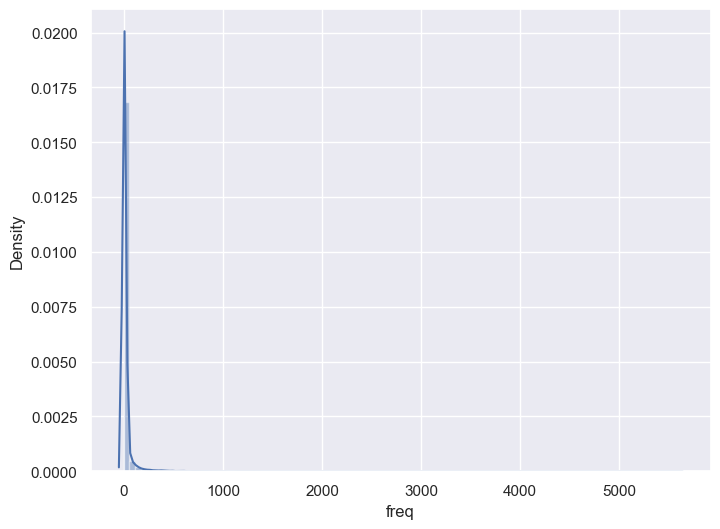

In [68]:
plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);

In [69]:
dict_df.sort_values('freq', ascending=False).head(10)

,freq
people,5587
chinese,3993
tiktok,3827
government,3331
get,3181
app,2938
ban,2699
use,2666
say,2658
think,2527


In [70]:
extension = dict_df[dict_df.freq>1000].index.tolist()

In [71]:
ids=[id2word.token2id[extension[i]] for i in range(len(extension))]
id2word.filter_tokens(bad_ids=ids)

In [72]:
# add high frequency words to stop words list
stop_words.extend(extension)
# rerun the process_words function
data_ready = process_words(data)
# recreate Dictionary
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 17198


In [73]:
# Filter out words that occur less than 10 documents, or more than
# 50% of the documents.
id2word.filter_extremes(no_below=10, no_above=0.5)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 3180


In [74]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [75]:
mallet_path = '/Users/sakice/Downloads/mallet-2.0.8/bin/mallet'

In [76]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=6, id2word=id2word)

Mallet LDA: 6 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 445
total tokens: 203746
<10> LL/token: -8.98087
<20> LL/token: -8.65631
<30> LL/token: -8.41128
<40> LL/token: -8.22538

0	8.33333	lot learn video language lol fuck word speak show talk reddit english love start hard short sound find mandarin hope 
1	8.33333	red call book real idea point push talk exist freedom free put political form video kind pretty society young search 
2	8.33333	happen read question source genocide call number nation state care action person stop report concern life live wrong side send 
3	8.33333	work year world day support system force pay large man great back claim argument camp class western power political population 
4	8.33333	foreign control security citizen sell law national speech information access influence phone steal manipulate include target spread group buy issue 
5	8.33333	comment remove note tok feel reason literally hear tik follow privacy account delete week kid issue v

In [77]:
from pprint import pprint
# display topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('lot', 0.025374125030171373),
   ('video', 0.023986241853729183),
   ('learn', 0.02108979000724113),
   ('language', 0.014301230992034758),
   ('pretty', 0.013486603910209992),
   ('hate', 0.011706492879555877),
   ('hard', 0.011615978759353126),
   ('word', 0.01146512189234854),
   ('understand', 0.01146512189234854),
   ('stuff', 0.011434950518947622)]),
 (1,
  [('point', 0.02314531409415537),
   ('red', 0.022387407083515522),
   ('talk', 0.018889374726716222),
   ('call', 0.016236700189476753),
   ('book', 0.014720886168197056),
   ('censorship', 0.012534615945197494),
   ('political', 0.012418014866637517),
   ('power', 0.011864159743477628),
   ('idea', 0.011193703541757761),
   ('censor', 0.010843900306077832)]),
 (2,
  [('happen', 0.022427207355888247),
   ('care', 0.016621478250618885),
   ('fact', 0.0150595308263586),
   ('read', 0.014912177295768006),
   ('stop', 0.011523046092184368),
   ('person', 0.01149357538606625),
   ('state', 0.011169397618766945),
   ('great

In [78]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('Coherence Score: ', coherence_ldamallet)

Coherence Score:  0.49179729397435734


Save lda model

In [79]:
import pickle
pickle.dump(ldamallet, open("/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/PKL/ldamallet.pkl", "wb"))

In [80]:
ldamallet.save("/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/PKL/lda_model")

Save lda model dictionary

In [81]:
dictionary = ldamallet.id2word
dictionary_path = "/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/PKL/dictionary.dict"
dictionary.save(dictionary_path)
print(f"Dictionary saved to {dictionary_path}")

Dictionary saved to /Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/PKL/dictionary.dict


In [82]:
tm_results = ldamallet[corpus]

In [83]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [84]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=6)] for n in range(0, ldamallet.num_topics)]

In [85]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 7)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
Term1,lot,point,happen,work,control,comment
Term2,video,red,care,year,foreign,reddit
Term3,learn,talk,fact,live,issue,lol
Term4,language,call,read,world,citizen,fuck
Term5,pretty,book,stop,life,security,feel


In [86]:
# set column width
pd.set_option('display.max_colwidth', None)

# Create the DataFrame
topics_df = pd.DataFrame(
    [', '.join([term for term, wt in topic]) for topic in topics],
    columns=['Terms per Topic'],
    index=['Topic' + str(t) for t in range(1, ldamallet.num_topics + 1)]
)

# Display the DataFrame
topics_df

,Terms per Topic
Topic1,"lot, video, learn, language, pretty, hate"
Topic2,"point, red, talk, call, book, censorship"
Topic3,"happen, care, fact, read, stop, person"
Topic4,"work, year, live, world, life, pay"
Topic5,"control, foreign, issue, citizen, security, sell"
Topic6,"comment, reddit, lol, fuck, feel, account"


/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_82174/3055096082.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wc.generate(text=topics_df["Terms per Topic"][i])


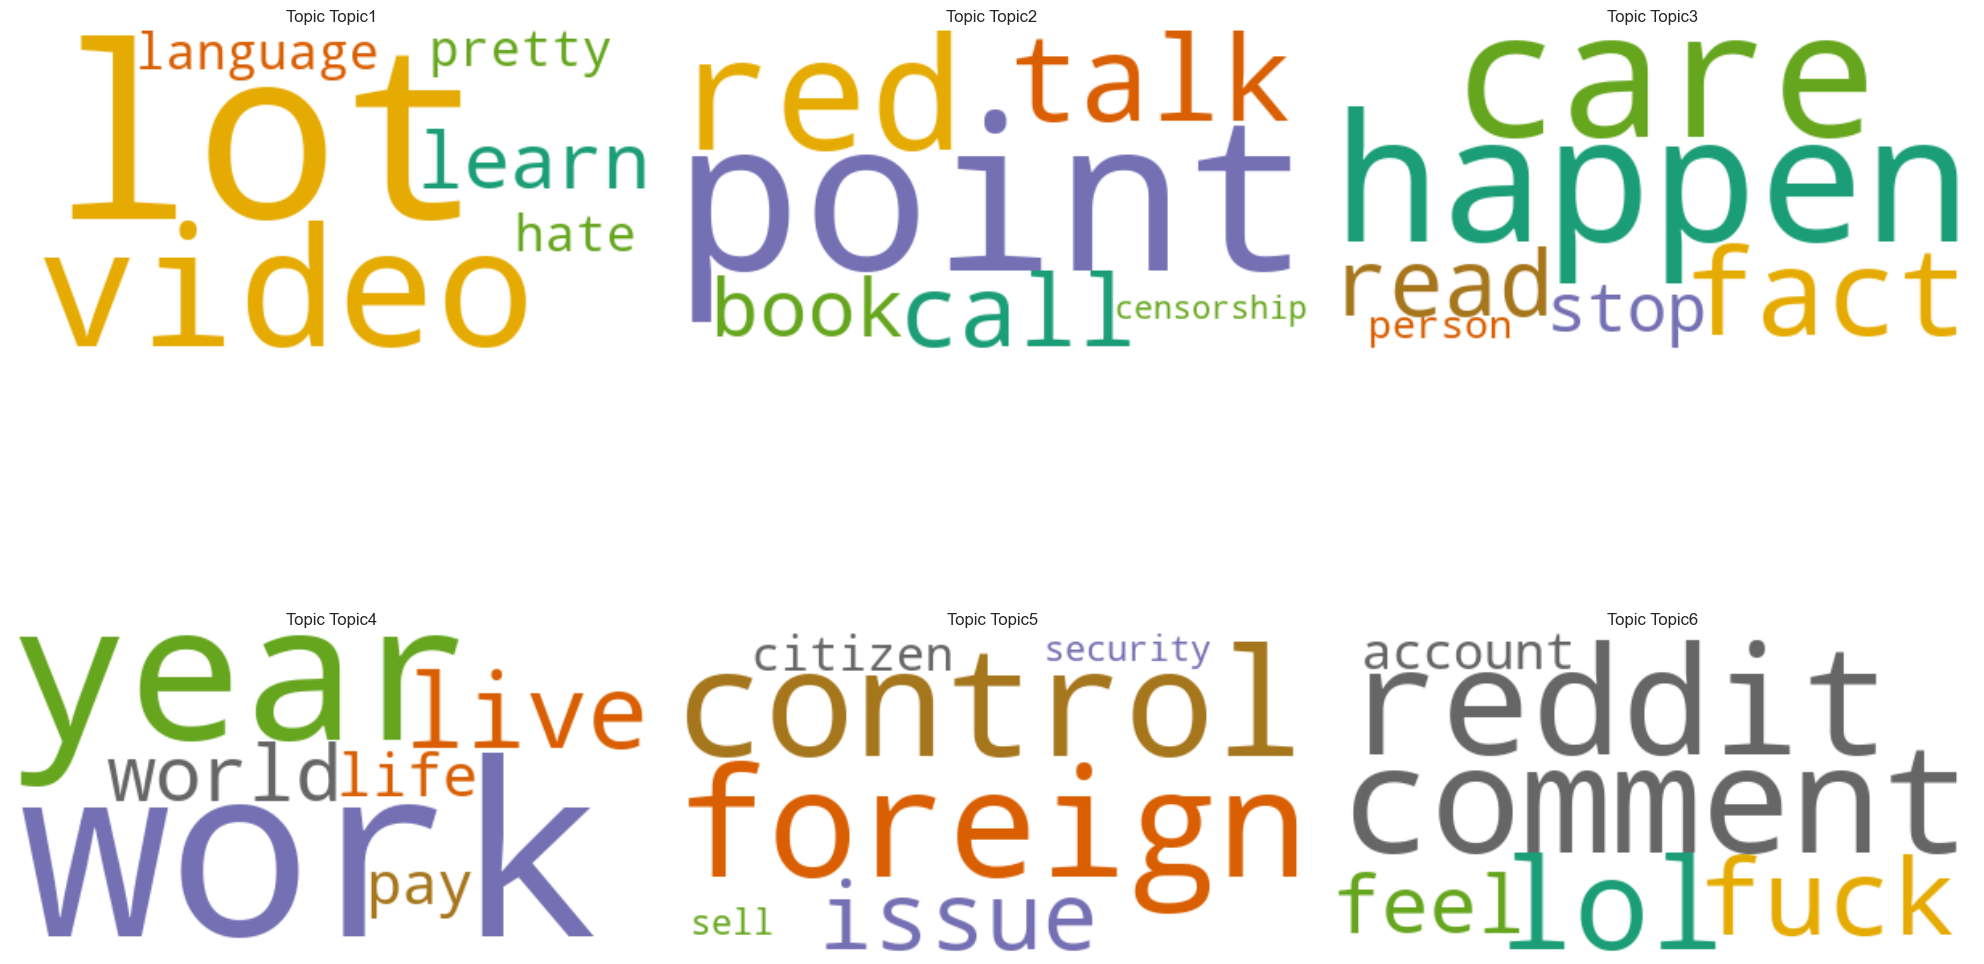

<Figure size 2000x1500 with 0 Axes>

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 初始化 WordCloud 对象
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# 设置图表尺寸
plt.rcParams['figure.figsize'] = [20, 15]

# 动态设置子图布局
rows = 2  # 行数
cols = 3  # 列数

# 遍历主题生成词云
for i in range(min(len(topics_df), rows * cols)):  # 确保不超出主题数量
    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(rows, cols, i + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topics_df.index[i]}")

# 显示图表
plt.tight_layout()
plt.show()

# 保存词云图
plt.savefig("wordcloud_topics.png", dpi=300, bbox_inches="tight")

In [88]:
from gensim.models.ldamodel import LdaModel

def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [89]:
ldagensim = convertldaMalletToldaGen(ldamallet)

In [90]:
import pyLDAvis.gensim as gensimvis
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

In [91]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

# 准备可视化数据
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)

# 显示可视化结果
pyLDAvis.display(vis_data)

# 将可视化结果保存为 HTML 文件
pyLDAvis.save_html(vis_data, 'lda_visualization.html')

In [92]:
df

,type,title,author,score,url,created,num_comments,subreddit,content
0,post,Rednote the chinese version of tik tok is #2 in the app store currently.,GuitarIsLife02,1041,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:50:26+00:00,429.0,TheDeprogram,the people once again showing how based they can maybe foreign perspectives will help lot these shitlibs some sort way
1,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,AutoModerator,1,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:50:28+00:00,NaN,TheDeprogram,subscribe the bois youtube and support the patreon comrades \n\nthis socialist community based the podcast the same name please use the report function content that breaks our rules send message our mod team youre new the sub please read the sidebar carefully\n\n youre new marxismleninism check out the study guiderthedeprogramwikiindexeducationstudyguide\n\nare there liberals the walls check out the wikirthedeprogramwikiindex which contains lots useful information\n\nthis subreddit uses many experimental automod rules you notice any issues please use modmail let know\n\n bot and this action was performed automatically please contact the moderators this subredditmessagecomposetorthedeprogram you have any questions concerns
2,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,KazVanilla,322,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:53:37+00:00,NaN,TheDeprogram,thought xiaohongshu was the chinese version loosely instagram ive had for few years now good algorithm which can easily tailored\n\nalso how would this shift the perspectives libs xiaohongshu does not explicitly talk about politics sense western liberal would recognise and moreso just social media app filled with chinese people partaking similar online trends and aesthetics
3,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,stalbox,128,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 08:07:56+00:00,NaN,TheDeprogram,tiktokdouyin the chinese version tiktok
4,comment,Rednote the chinese version of tik tok is #2 in the app store currently.,soweli_tonsi,197,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 08:01:10+00:00,NaN,TheDeprogram,goddam this bleak snapshot into the very very long and tortuous american collapse
...,...,...,...,...,...,...,...,...,...
21411,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,ToKeNgT,36,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 11:59:54+00:00,NaN,TheDeprogram,NaN
21412,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,nukefall_,10,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 13:36:19+00:00,NaN,TheDeprogram,metatitleee
21413,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,boopbopnotarobot,6,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 14:49:21+00:00,NaN,TheDeprogram,roll credits
21414,comment,CIA headquarters rn after Rednote just deprogrammed hundreds of thousands of Americans,CarpenterCheaper,8,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 15:48:20+00:00,NaN,TheDeprogram,live lightiggy reaction


In [93]:
# create a dataframe
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
# corpus_topic_df['Title'] = df['title']
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df.head()

,Dominant Topic,Contribution %,Topic Terms
0,1,18.25,"lot, video, learn, language, pretty, hate"
1,6,37.65,"comment, reddit, lol, fuck, feel, account"
2,2,21.89,"point, red, talk, call, book, censorship"
3,6,18.30,"comment, reddit, lol, fuck, feel, account"
4,4,18.38,"work, year, live, world, life, pay"


In [94]:
dominant_topic_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

dominant_topic_df['Total_Docs_Perc'] = dominant_topic_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(corpus), 2))

dominant_topic_df

,Dominant Topic,Doc_Count,Total_Docs_Perc
0,1,6471,30.22
1,2,2895,13.52
2,3,2883,13.46
3,4,2660,12.42
4,5,3017,14.09
5,6,3490,16.30


In [95]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])).reset_index(drop=True)

/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_82174/507245855.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])).reset_index(drop=True)


,Dominant Topic,Contribution %,Topic Terms
0,1,45.92,"lot, video, learn, language, pretty, hate"
1,2,86.15,"point, red, talk, call, book, censorship"
2,3,56.32,"happen, care, fact, read, stop, person"
3,4,68.57,"work, year, live, world, life, pay"
4,5,84.46,"control, foreign, issue, citizen, security, sell"
5,6,65.05,"comment, reddit, lol, fuck, feel, account"


In [96]:
pprint(tm_results[0])

[(0, 0.18253968253968253),
 (1, 0.1726190476190476),
 (2, 0.17063492063492064),
 (3, 0.15873015873015872),
 (4, 0.16666666666666666),
 (5, 0.14880952380952378)]


In [97]:
df_weights = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
df_weights.columns = ['Topic ' + str(i) for i in range(1,7)]
df_weights

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,0.182540,0.172619,0.170635,0.158730,0.166667,0.148810
1,0.114815,0.151852,0.137037,0.097531,0.122222,0.376543
2,0.189055,0.218905,0.159204,0.154229,0.124378,0.154229
3,0.163399,0.163399,0.163399,0.163399,0.163399,0.183007
4,0.160256,0.170940,0.160256,0.183761,0.164530,0.160256
...,...,...,...,...,...,...
21411,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
21412,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
21413,0.160256,0.160256,0.179487,0.177350,0.162393,0.160256
21414,0.160256,0.179487,0.160256,0.179487,0.160256,0.160256


In [98]:
df['created'] = pd.to_datetime(df['created'])
df['date'] = df['created'].dt.date

df_weights['Date'] = df['date']

df_weights.groupby('Date').mean()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
Date,,,,,,
2025-01-12,0.177966,0.172316,0.155367,0.161959,0.165725,0.166667
2025-01-13,0.170661,0.167600,0.161479,0.163062,0.161921,0.175276
2025-01-14,0.168830,0.165606,0.164016,0.163498,0.167976,0.170073
2025-01-15,0.167591,0.166063,0.166748,0.165988,0.167364,0.166246
2025-01-16,0.166539,0.166180,0.167448,0.167895,0.167065,0.164873
2025-01-17,0.168664,0.166665,0.166991,0.167434,0.164757,0.165490


In [99]:
df_weights['Dominant'] = df_weights.drop('Date', axis=1).idxmax(axis=1)
df_weights.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Date,Dominant
0,0.182540,0.172619,0.170635,0.158730,0.166667,0.148810,2025-01-13,Topic 1
1,0.114815,0.151852,0.137037,0.097531,0.122222,0.376543,2025-01-13,Topic 6
2,0.189055,0.218905,0.159204,0.154229,0.124378,0.154229,2025-01-13,Topic 2
3,0.163399,0.163399,0.163399,0.163399,0.163399,0.183007,2025-01-13,Topic 6
4,0.160256,0.170940,0.160256,0.183761,0.164530,0.160256,2025-01-13,Topic 4


In [100]:
df_dominance = df_weights.groupby('Date')['Dominant'].value_counts(normalize=True).unstack()
df_dominance

Dominant,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
Date,,,,,,
2025-01-12,0.500000,0.500000,NaN,NaN,NaN,NaN
2025-01-13,0.304267,0.126160,0.070501,0.098330,0.120594,0.280148
2025-01-14,0.306176,0.127201,0.105125,0.093035,0.157687,0.210775
2025-01-15,0.296625,0.134333,0.133481,0.118991,0.147971,0.168599
2025-01-16,0.298096,0.136666,0.142857,0.135583,0.146572,0.140226
2025-01-17,0.310985,0.141472,0.155809,0.143158,0.113219,0.135357
